In [48]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [49]:
import tensorflow as tf
import os

import numpy as np
import matplotlib.pyplot as plt
# import zipfile


DESIRED_ACCURACY = 0.999

# !wget --no-check-certificate \
#     "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
#     -O "/tmp/happy-or-sad.zip"

# zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
# zip_ref.extractall("/tmp/h-or-s")
# zip_ref.close()


class customCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy')>DESIRED_ACCURACY:
            print("\nReached {}% accuracy so cancelling training!".format(DESIRED_ACCURACY*100))
            self.model.stop_training = True

callbacks = customCallback()

In [50]:
os.listdir('../../tmp/happy-or-sad/')

['happy', 'sad']

In [51]:
len(os.listdir(happy_dir))

40

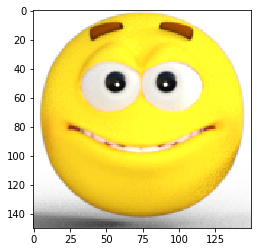

In [52]:
happy_dir = '../../tmp/happy-or-sad/happy/'

image = plt.imread(happy_dir+np.random.choice(os.listdir(happy_dir)))

plt.imshow(image);

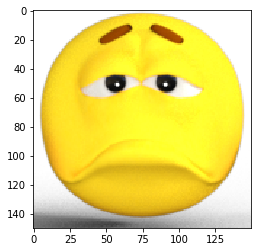

In [53]:
sad_dir = '../../tmp/happy-or-sad/sad/'

image = plt.imread(sad_dir+np.random.choice(os.listdir(sad_dir)))

plt.imshow(image[:,:,0:4]);

In [54]:
image.shape

(150, 150, 4)

In [55]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [56]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [57]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
         '../../tmp/happy-or-sad/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [58]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit(
            train_generator,
      steps_per_epoch=2,  
      epochs=30,
      verbose=1,
        callbacks=[callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/30
2/2 [==============================] - 1s 516ms/step - loss: 6.4875 - accuracy: 0.5250
Epoch 2/30
2/2 [==============================] - 0s 223ms/step - loss: 1.8466 - accuracy: 0.5250
Epoch 3/30
2/2 [==============================] - 0s 194ms/step - loss: 0.7295 - accuracy: 0.5250
Epoch 4/30
2/2 [==============================] - 0s 196ms/step - loss: 0.6114 - accuracy: 0.6750
Epoch 5/30
2/2 [==============================] - 0s 197ms/step - loss: 0.5632 - accuracy: 0.6750
Epoch 6/30
2/2 [==============================] - 0s 199ms/step - loss: 0.7462 - accuracy: 0.5250
Epoch 7/30
2/2 [==============================] - 0s 207ms/step - loss: 0.5138 - accuracy: 0.6750
Epoch 8/30
2/2 [==============================] - 0s 194ms/step - loss: 0.4403 - accuracy: 0.8250
Epoch 9/30
2/2 [==============================] - 0s 196ms/step - loss: 0.4003 - accuracy: 0.7750
Epoch 10/30
2/2 [==============================] - 0s 196ms/step - loss: 0.7748 - accuracy: 0.5000
Epoch 11/30
2/2 [==